In [1]:
import sys
import os
sys.path.append("../")
from corpus.FilmCorpus import FilmCorpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
api = FilmCorpus("/home/tonyzhao/Documents/Projects/DeepLearningProject/Data")

Done parsing 2498 films with 3438845 utts


In [3]:
api.remove_dupliate()

Done parsing 959 films with 1350026 utts


In [4]:
dialog_len = [len(d) for d in api.dialogs.values()]

In [5]:
api.dump_dialogs()

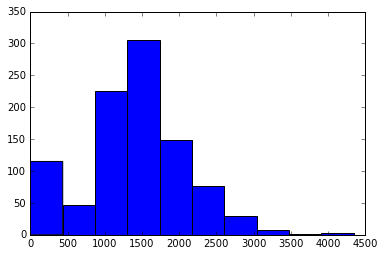

In [6]:
fig = plt.hist(dialog_len)
plt.show()

## Find major character

In [6]:
def collect_character_info(dialog):
    char_word_cnt = {}
    for char, line in dialog:
        cnt = char_word_cnt.get(char, 0)
        char_word_cnt[char] = cnt + len(line.split())
    temp = [(cnt, char) for char, cnt in char_word_cnt.iteritems()]
    return sorted(temp, reverse=True)

In [7]:
char_wcs = [collect_character_info(d) for d in api.dialogs.values()]

In [5]:
prot = api.get_protagonists()

In [9]:
f = open('major_char.json', 'wb')
import json
json.dump(prot, f)
f.close()

In [6]:
ratio = [float(major_cnt)/(major_cnt+bg_cnt) for (major_cnt, major), (bg_cnt, bg) in prot.values()]

(array([  65.,  284.,  327.,  185.,   62.,   18.,    4.,    0.,    0.,   14.]),
 array([ 0.05863014,  0.15276712,  0.24690411,  0.3410411 ,  0.43517808,
         0.52931507,  0.62345205,  0.71758904,  0.81172603,  0.90586301,  1.        ]),
 <a list of 10 Patch objects>)

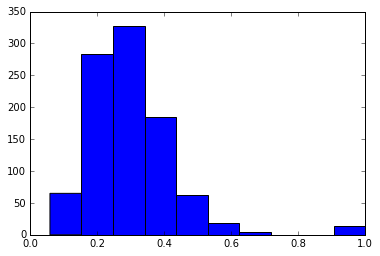

In [7]:
plt.hist(ratio)

In [8]:
np.mean(ratio)

0.30117506752893003

In [9]:
api.dialogs.keys()

['15minutes_dialog.txt',
 'conanthebarbarian_dialog.txt',
 'jasonx_dialog.txt',
 'newsies_dialog.txt',
 'boondocksaintsthe_dialog.txt',
 'knockedup_dialog.txt',
 'silverliningsplaybook_dialog.txt',
 'theressomethingaboutmary_dialog.txt',
 '2012_dialog.txt',
 'traffic_dialog.txt',
 'starshiptroopers_dialog.txt',
 'bloodandwine_dialog.txt',
 'twoforthemoney_dialog.txt',
 'whileshewasout_dialog.txt',
 'tallinthesaddle_dialog.txt',
 'assignmentthe_dialog.txt',
 'romeojuliet_dialog.txt',
 'slumdogmillionaire_dialog.txt',
 'cars2_dialog.txt',
 'batman2_dialog.txt',
 'threekingsspoilsofwar_dialog.txt',
 'idesofmarchthe_dialog.txt',
 'jacketthe_dialog.txt',
 'brick_dialog.txt',
 'cirquedufreakthevampiresassistant_dialog.txt',
 'allthepresidentsmen_dialog.txt',
 'sexandthecity_dialog.txt',
 'logansrun_dialog.txt',
 'losthighway_dialog.txt',
 'goodwillhunting_dialog.txt',
 'bladetrinity_dialog.txt',
 'graduatethe_dialog.txt',
 'deepcover_dialog.txt',
 'feast_dialog.txt',
 'bookofelithe_dialog.tx

In [10]:
prot['hitchhikersguidetothegalaxythe_dialog.txt']

((2706, 'ARTHUR'), (15486, 'background'))

In [11]:
prot['batman2_dialog.txt']

((3839, 'BRUCE'), (27867, 'background'))